# PROJECT : HUMAN RESOURCES ANALYTICS 
DATASET : HR_comma_sep.csv

### STEP 1 : IMPORTING LIBRARIES

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### STEP 2 : IMPORTING DATASET

In [68]:
#read_csv() function is used to read the dataset where csv refers to comma s
dataframe=pd.read_csv("HR_comma_sep.csv")


In [69]:
#Let's now check what is there in the dataset which we named as dataframe
dataframe


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [70]:
#The below statement gives the column names
dataframe.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

### STEP 3 : LET'S NOW GET THE IDEA OF THE DATASET


In [71]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### STEP 4 : LET'S NOW PLOT THE GRAPH TO IDENTIFY THE NULL VALUES 
OR SIMPLY BY LOOKING AT THE INFO OF THE DATASET(NON-NULL COUNT) ABOVE WE CAN TELL IF THE
COLUMN IS NON-NULL OR NULL

<AxesSubplot:>

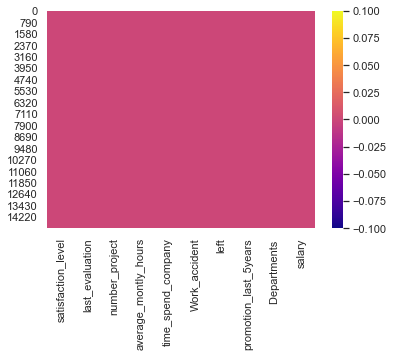

In [72]:
sns.heatmap(dataframe.isnull(),cmap="plasma")

In [73]:
#Now let's check what are all there in dataframe(by default first 5 rows)
dataframe.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### STEP 5:LET'S CHECK HOW EACH FEATURE IS RELATED TO LABEL 

HERE LEFT IS OUR TARGET VARIABLE

<AxesSubplot:>

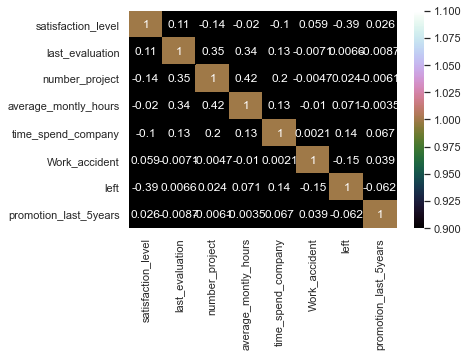

In [74]:
corr=dataframe.corr()
sns.heatmap(corr,annot=True,vmax=1,vmin=1,cmap="cubehelix")

### STEP 6: NOW LETS CHECK THE RATIO OF LEFT WHETHER THEY STAYED OR NOT

<AxesSubplot:xlabel='left', ylabel='count'>

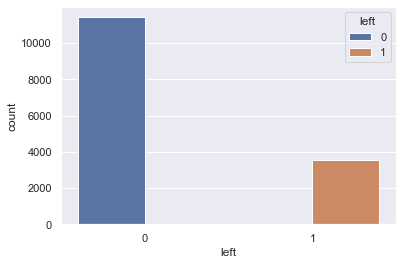

In [75]:
sns.set(style="darkgrid")
sns.countplot(x="left", data=dataframe,hue="left")

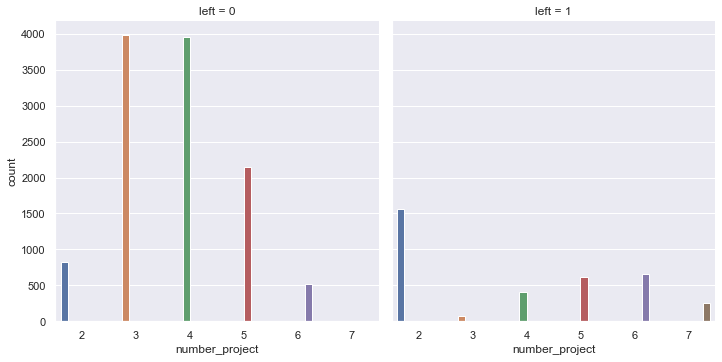

In [76]:
sns.catplot(x="number_project",hue="number_project",col="left",data=dataframe,kind="count")

<AxesSubplot:xlabel='left', ylabel='count'>

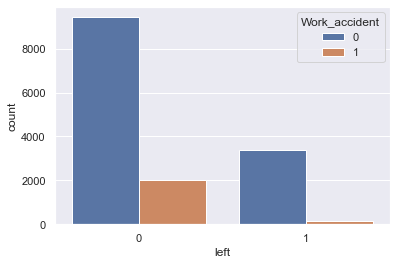

In [77]:
sns.countplot(x="left",hue="Work_accident",data=dataframe)

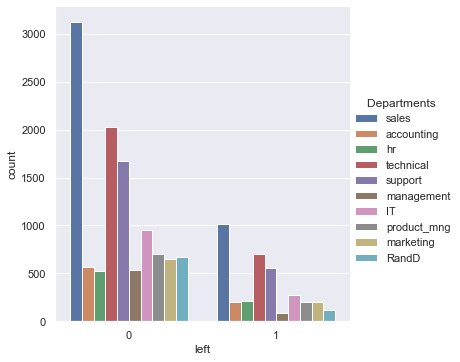

In [78]:
sns.catplot(x="left",hue="Departments ", kind="count" ,data=dataframe)

<AxesSubplot:xlabel='left', ylabel='count'>

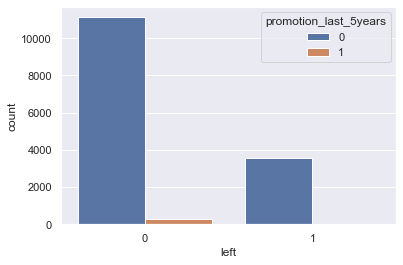

In [79]:
sns.countplot(x="left",hue="promotion_last_5years",data=dataframe)

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

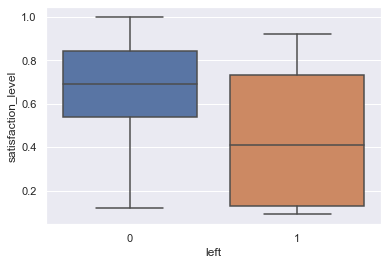

In [80]:
sns.boxplot(y="satisfaction_level",x="left",data=dataframe)

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

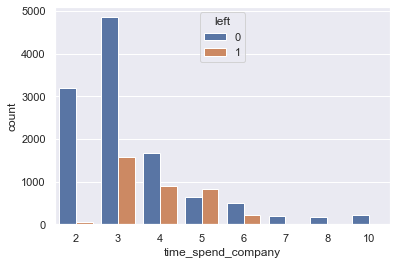

In [81]:
sns.countplot(x="time_spend_company",hue="left",data=dataframe)

<AxesSubplot:xlabel='salary', ylabel='count'>

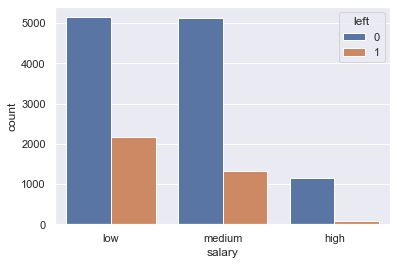

In [84]:
sns.countplot(hue="left",x="salary",data=dataframe)

### STEP 7 : ENCODING THE CATEGROICAL COLUMNS!
BY LOOKING AT THE INFO ABOVE, WE CAN TELL THAT THERE ARE TWO COLUMN NAMES OF TYPE OBJECT. SPECIFIES THAT THERE ARE TWO CATEGORICAL COLUMNS. 

In [19]:
dept=pd.get_dummies(dataframe["Departments "],drop_first=True)
dataframe=pd.concat([dataframe,dept],axis=1)


In [20]:
#Now let's view the department values
(dept.head(6))

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,1,0,0


In [21]:
(dept.tail(6))

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
14993,0,0,0,0,0,0,0,1,0
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0
14998,0,0,0,0,0,0,0,1,0


In [22]:
#Now let's view the dataframe
dataframe.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,sales,low,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,sales,low,0,0,0,0,0,0,1,0,0


In [23]:
#Encoding salary column and concatinating with the dataset
sal=pd.get_dummies(dataframe["salary"],drop_first=True)
dataframe=pd.concat([dataframe,sal],axis=1)


In [24]:
sal.head()


,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [25]:
dataframe.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,...,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


In [26]:
#Department and salary column after encoding must be removed from the datase
dataframe.drop(["Departments "],axis=1,inplace=True)
dataframe.drop(["salary"],axis=1,inplace=True)


### STEP 8 :  CHOOSING OUR TARGET VARIABLE
AS EVERY COLUMN IS IMPORTANT IN GETTING THE OUTPUT, SO WE WILL NOT

DROP ANY COLUMN

OUR TARGET VARIABLE IF "LEFT"

STEP 9 : EXTRACTING THE FEATURES AND LABELS


In [27]:
X = dataframe.drop('left',axis=1)
Y = dataframe['left']

In [28]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [29]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

### STEP 10 : SPLITTING THE DATA INTO TRAINING AND TESTING


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.1,random_state=0)


In [31]:
x_train.shape

(13499, 18)

In [32]:
y_train.shape[0]


13499

In [33]:
x_test.shape

(1500, 18)

In [34]:
y_test.shape[0]


1500

In [35]:
dataframe.shape

(14999, 19)

The above statements say that x_test[0]+y_test[0]==dataframe[0]. The shapes depend upon the test_size.

As we have given it test_size=0.5 which means we are splitting the dataset half for the
training process and half for the testing process

### STEP 11 : TRAINING THE DATASET USING THE DIFFERENT CLASSIFIERS
NOW THIS STEP INCLUDES APPLYING THE DIFFERENT CLASSIFICATION ALGORITHMS AND FURTHER CALUCLATING THE ACCURACIES.HERE WE CHOOSED THE MOST BASIC ALGORITHMS OF CLASSIFICATION THAT IS NAIVE BAYES,LOGISTIC REGRESSION AND RANDOM FOREST.

#### USING NAIVES BAYES CLASSIFIER

In [36]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
n_pred=nb.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print('Classification Report:')
print(classification_report(y_test,n_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1141
           1       0.46      0.80      0.59       359

    accuracy                           0.73      1500
   macro avg       0.69      0.75      0.69      1500
weighted avg       0.81      0.73      0.75      1500



#### STEP 11A: VERIFYING THE ACCURACY USING NAIVE BAYES CLASSIFIER

In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score
nrecall=round(recall_score(y_test,n_pred)*100,2)
nf1=round(f1_score(y_test, n_pred)*100,2)
nprec=round(precision_score(y_test,n_pred)*100,2)
naiveAccuracy=round(accuracy_score(y_test, n_pred)*100,2)

In [39]:
print(nrecall)
print(nf1)
print(nprec)
print(naiveAccuracy)

80.22
58.6
46.15
72.87


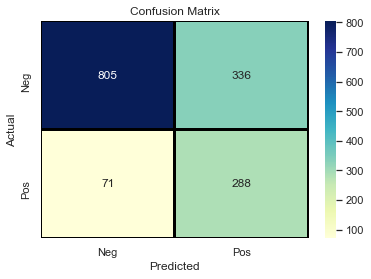

In [40]:
cm = confusion_matrix(y_test, n_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [41]:
result1=["1.","Naive Bayes"]
result1.append(nprec)
result1.append(nrecall)
result1.append(nf1)
result1.append(naiveAccuracy)
print(result1)

['1.', 'Naive Bayes', 46.15, 80.22, 58.6, 72.87]


#### SO,USING NAIVE BAYES CLASSIFIER WE GOT AN ACCURACY OF 72%.

#### USING LOGISTIC REGRESSION 

In [42]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)


LogisticRegression()

In [43]:
y_pred = regressor.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1141
           1       0.63      0.40      0.49       359

    accuracy                           0.80      1500
   macro avg       0.73      0.66      0.68      1500
weighted avg       0.78      0.80      0.78      1500



#### STEP 11B : VERIFYING THE ACCURACY USING LOGISTIC REGRESSION

In [45]:
from sklearn.metrics import precision_score,recall_score,f1_score
lrecall=round(recall_score(y_test,y_pred)*100,2)
lf1=round(f1_score(y_test, y_pred)*100,2)
lprec=round(precision_score(y_test,y_pred)*100,2)
logisticAccuracy=round(accuracy_score(y_test, y_pred)*100,2)


In [46]:
print(lrecall)
print(lf1)
print(lprec)
print(logisticAccuracy)

40.39
49.24
63.04
80.07


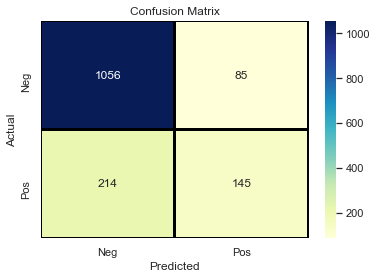

In [47]:
cm = confusion_matrix(y_test, y_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [48]:
result2=["2.","Logistic Regression"]
result2.append(lprec)
result2.append(lrecall)
result2.append(lf1)
result2.append(logisticAccuracy)
print(result2)

['2.', 'Logistic Regression', 63.04, 40.39, 49.24, 80.07]


#### SO USING LOGISTIC REGRESSION OF CLASSIFICATION WE GOT AN ACCURACY OF 80%

#### Using Decision tree classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [50]:
d_pred = dtc.predict(x_test)

In [51]:
print('Classification Report:')
print(classification_report(y_test, d_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1141
           1       0.96      0.98      0.97       359

    accuracy                           0.99      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500



#### STEP 11C : VERIFYING THE ACCURACY USING DECISION TREE CLASSIFIER

In [52]:
from sklearn.metrics import precision_score,recall_score,f1_score
drecall=round(recall_score(y_test,d_pred)*100,2)
df1=round(f1_score(y_test, d_pred)*100,2)
dprec=round(precision_score(y_test,d_pred)*100,2)
dcAccuracy=round(accuracy_score(y_test, d_pred)*100,2)

In [53]:
print(drecall)
print(df1)
print(dprec)
print(dcAccuracy)

98.05
96.97
95.91
98.53


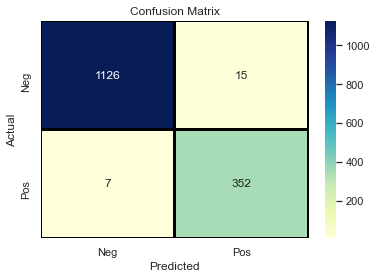

In [54]:
cm = confusion_matrix(y_test, d_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [55]:
result3=["3.","Decision Tree classifier"]
result3.append(dprec)
result3.append(drecall)
result3.append(df1)
result3.append(dcAccuracy)
print(result3)

['3.', 'Decision Tree classifier', 95.91, 98.05, 96.97, 98.53]


#### USING DECISION TREE CLASSIFIER APPROACH WE GOT THE ACCURACY 98%

#### USING RANDOM FOREST ALGORITHM

In [56]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(n_estimators=10,random_state=None)
rand.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [57]:
r_pred = rand.predict(x_test)

#### STEP 11D : VERIFYING THE ACCURACY USING RANDOM FOREST CLASSIFIER

In [58]:
print('Classification Report:')
print(classification_report(y_test, r_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1141
           1       0.99      0.96      0.97       359

    accuracy                           0.99      1500
   macro avg       0.99      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500



In [59]:
from sklearn.metrics import precision_score,recall_score,f1_score
rrecall=round(recall_score(y_test,r_pred)*100,2)
rf1=round(f1_score(y_test, r_pred)*100,2)
rprec=round(precision_score(y_test,r_pred)*100,2)
randAccuracy=round(accuracy_score(y_test,r_pred )*100,2)

In [60]:
print(rrecall)
print(rf1)
print(rprec)
print(randAccuracy)

95.82
97.31
98.85
98.73


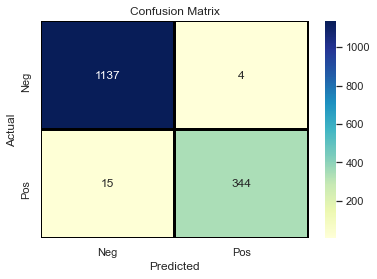

In [61]:
cm = confusion_matrix(y_test, r_pred)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [62]:
result4=["4.","Random Forest classifier"]
result4.append(rprec)
result4.append(rrecall)
result4.append(rf1)
result4.append(randAccuracy)
print(result4)

['4.', 'Random Forest classifier', 98.85, 95.82, 97.31, 98.73]


#### USING RANDOM FOREST CLASSIFIER APPROACH WE GOT THE ACCURACY 99%

### STEP13 : PLOTTING THE ACCURACIES OF DIFFERENT ALGORITHMS AND CHOOSING THE BEST

<BarContainer object of 4 artists>

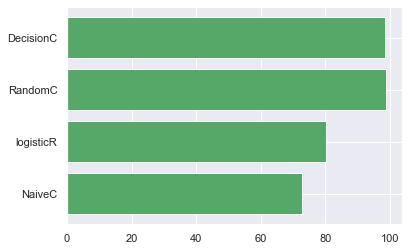

In [63]:
plt.barh(['NaiveC','logisticR','RandomC','DecisionC'],[naiveAccuracy,logisticAccuracy,randAccuracy,dcAccuracy], color='g')

### SO,RANDOM FOREST GIVES THE HIGHEST ACCURACY WITH 99%

In [64]:
from prettytable import PrettyTable
Result_table = PrettyTable(["S.No.","Model","Precision Score","Recall Score","F1 Score","Accuracy"])
Result_table.add_row(result1)
Result_table.add_row(result2)
Result_table.add_row(result3)
Result_table.add_row(result4)
print(Result_table)

+-------+--------------------------+-----------------+--------------+----------+----------+
| S.No. |          Model           | Precision Score | Recall Score | F1 Score | Accuracy |
+-------+--------------------------+-----------------+--------------+----------+----------+
|   1.  |       Naive Bayes        |      46.15      |    80.22     |   58.6   |  72.87   |
|   2.  |   Logistic Regression    |      63.04      |    40.39     |  49.24   |  80.07   |
|   3.  | Decision Tree classifier |      95.91      |    98.05     |  96.97   |  98.53   |
|   4.  | Random Forest classifier |      98.85      |    95.82     |  97.31   |  98.73   |
+-------+--------------------------+-----------------+--------------+----------+----------+
